,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol
0,7.0,8.49,13,basic,['chembl25'],819316,
1,6.95,6.54,7,basic,['chembl25'],15185598,
2,6.41,8.46,13,basic,['chembl25'],815736,
3,7.6,7.3,11,basic,['chembl25'],602489,
4,5.44,6.07,8,basic,['datawarrior'],2143,
...,...,...,...,...,...,...,...
564,6.47,6.64,8,basic,['datawarrior'],2731,
565,6.9,9.08,8,basic,['datawarrior'],1122,
566,7.5,7.3,15,basic,['chembl25'],626403,
567,9.33,5.49,8,basic,['datawarrior'],3350,

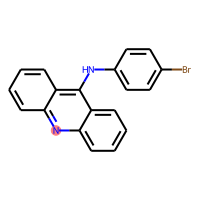
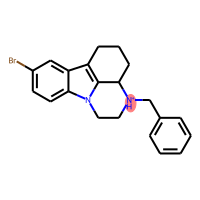
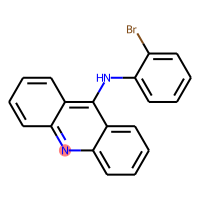
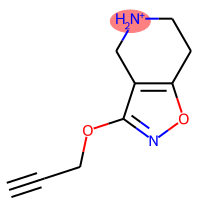
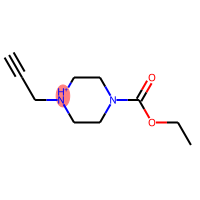
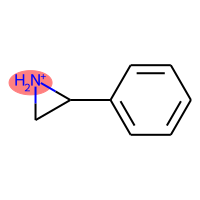
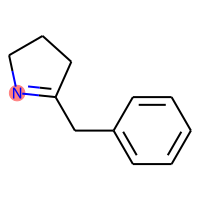
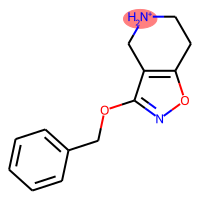
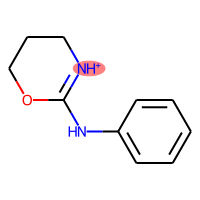
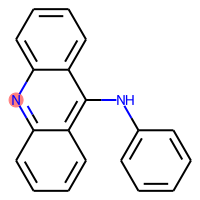

In [3]:
from rdkit.Chem.PandasTools import LoadSDF

df = LoadSDF("/data/shared/projects/pkasolver-data/misc_filtered_experimental_training_molecules.sdf")
for mol, atom in zip(df.ROMol,df.marvin_atom):
    mol.__sssAtoms = [int(atom)]
df